In [4]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
#reading csv file
data=pd.read_csv('train.csv')

In [10]:
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


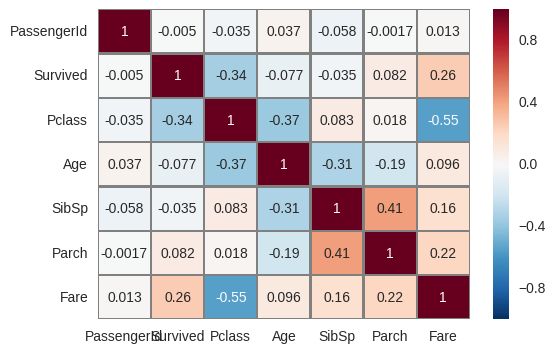

In [13]:
sns.heatmap(data.corr(),linewidths=1,linecolor='grey',annot=True)

In [14]:
#38.38% people surived in train.csv file
data['Survived'].mean()

0.3838383838383838

In [15]:
#Most % of people Survived-> 1st class
data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [18]:
# 74% of females survived as compared to 18.8% people suvived
data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [19]:
pclass_sex_group=data.groupby(['Pclass','Sex']).mean()
pclass_sex_group

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

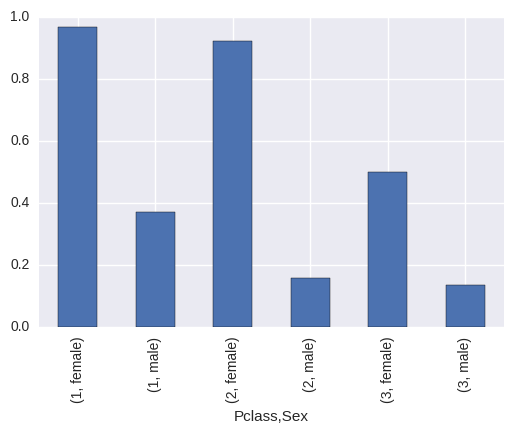

In [20]:
# clearly lower % percent people survived as Pclass decreases
pclass_sex_group['Survived'].plot.bar()

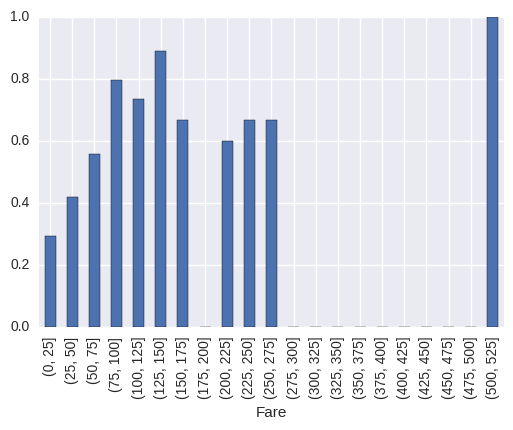

In [21]:
# Almost all survived (500,525) but no one in (175,200) strange
by_fare=pd.cut(data['Fare'],np.arange(0,550,25))
data.groupby(by_fare).mean()['Survived'].plot.bar()

In [22]:
data.groupby('Parch').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [23]:
data.groupby('Parch').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
Parch,,,,,,,,,,,
0,678,678,678,678,678,521,678,678,678,141,676
1,118,118,118,118,118,110,118,118,118,39,118
2,80,80,80,80,80,68,80,80,80,23,80
3,5,5,5,5,5,5,5,5,5,0,5
4,4,4,4,4,4,4,4,4,4,1,4
5,5,5,5,5,5,5,5,5,5,0,5
6,1,1,1,1,1,1,1,1,1,0,1


In [24]:
#drop columns Name, Cabin, Ticket, PassengerId, Age
drop_data=data.drop(['Name','Cabin','Ticket','PassengerId','Age'],axis=1)

In [25]:
#dropping rows whose Embarked value is not given
drop_data=drop_data[drop_data['Embarked']>0]
drop_data.count()

Survived    889
Pclass      889
Sex         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

In [26]:
#converting float to range eg->24.0 to (0,25)
by_fare=pd.cut(drop_data['Fare'],np.arange(0,550,25))
drop_data['Fare']=by_fare
drop_data.count()

Survived    889
Pclass      889
Sex         889
SibSp       889
Parch       889
Fare        874
Embarked    889
dtype: int64

In [27]:
drop_data.count()

Survived    889
Pclass      889
Sex         889
SibSp       889
Parch       889
Fare        874
Embarked    889
dtype: int64

In [28]:
import math


def solv(a):
    if a==0:
        return 0.0
    else:
        return (-a*math.log(a))/math.log(2)
    
    
def entropy(data):
    '''Calculate entropy'''
    
    total=data['Survived'].count()
    number_died=data[data['Survived']==0]['Survived'].count()
    number_alive=total-number_died
    p1=float(number_died/float(total))
    p2=float(number_alive/float(total))

    return (solv(p1)+solv(p2))

def gain(data,label):
    '''Gain of a particular Column'''
    total=float(data['Survived'].count())
    unique_elemnets=np.unique(data[label])
    ans=0
    
    for i in unique_elemnets:
        unique_data=data[data[label]==i]
        unique_count=float(unique_data['Survived'].count())
        ans+=entropy(unique_data)*(unique_count/total)

    return entropy(data)-ans

In [29]:
class DecisionTree(object):
    def __init__(self):
        self.col=''
        self.col_elements=dict()
        self.value=None
    
    def build(self,data):
        '''Build Decision Tree '''
        #which columns has best gain
        best_col=''
        #value of gain of best Column
        best_val=-99999999
        count=0
        
        #calculating Gain of each Column
        for i in data.columns:
            if i=='Survived':
                continue
            x=gain(data,i)
            if x>best_val:
                best_val=x
                best_col=i
            count+=1
            
        node=DecisionTree()
        node.col=best_col
    
       # if two columns remain,one is targe(Survived) and only one column remain to decide
        if count==2:
            if data[data['Survived']==1]['Survived'].count()>data[data['Survived']==0]['Survived'].count():
                node.value=1
            else:
                node.value=0
            
            return node
        
        #divide data according to best_col unique elements and again call build function
        for i in np.unique(data[best_col]):
            node.col_elements[i]=node.build(data[data[best_col]==i].drop(best_col,axis=1))

        return node    

In [30]:
drop_data.count()

Survived    889
Pclass      889
Sex         889
SibSp       889
Parch       889
Fare        874
Embarked    889
dtype: int64

In [31]:
#building tree on train.csv data
a=DecisionTree()
tree_node=a.build(drop_data)

/home/codeML/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [32]:
#classifying rows to 0 or 1
def classify(row,root):
    if root.value!=None:
        return root.value
    return classify(row,root.col_elements[row[root.col]])

In [33]:
#reading test.csv file
test=pd.read_csv('test.csv')
#dropping columns
drop_test=test.drop(['Name','Cabin','Ticket','PassengerId','Age'],axis=1)
drop_test.count()

Pclass      418
Sex         418
SibSp       418
Parch       418
Fare        417
Embarked    418
dtype: int64

In [34]:
by_fare=pd.cut(drop_test['Fare'],np.arange(0,550,25))
drop_test['Fare']=by_fare
drop_test.count()

Pclass      418
Sex         418
SibSp       418
Parch       418
Fare        415
Embarked    418
dtype: int64

In [35]:
#classif each row to 0 or 1
classify_list=[]
for i in range(drop_test.shape[0]):
    try:
        classify_list.append(classify(drop_test.iloc[i],tree_node))
    except:
        classify_list.append(1)

In [36]:
import csv
#writing test.csv result into result.csv file
with open('result.csv','wb') as f:
    write = csv.writer(f, delimiter=',')
    write.writerow(['PassengerId','Survived'])   
    
    for i in range(len(classify_list)):
        write.writerow([test['PassengerId'][i],classify_list[i]])

In [37]:
count=0
for i in range(drop_data.shape[0]):
    x=classify(drop_data.iloc[i],tree_node)
    if x==drop_data.iloc[i]['Survived']:
        count+=1
print count/float(drop_data.shape[0])    

0.822272215973


In [38]:
def randomForest(n):
    list_nodes=[]
    for i in range(n):
        list_nodes.append(pd.DataFrame())

    for i in range(drop_data.shape[0]):
        select=random.randint(0,n-1)
        list_nodes[select]=list_nodes[select].append(drop_data.iloc[[i]])
        
    root_nodes=[]
    for data in list_nodes:
        a=DecisionTree()
        tree_node=a.build(data)
        root_nodes.append(tree_node)
    return root_nodes    

In [39]:
forest=randomForest(121)

In [40]:
count=0
for i in range(drop_data.shape[0]):
    x=0
    y=0
    for j in forest:
        try:
            z=classify(drop_data.iloc[i],j)
            if z==0:
                x+=1
            else:
                y+=1
        except:
            continue

    if x==0 and y==0:
        ans=random.randint(0,1)
        print i
    else:
        if x>y:
            ans=0
        else:
            ans=1
    if ans==drop_data.iloc[i]['Survived']:
        count+=1
print count/float(drop_data.shape[0])        

0.81214848144


In [41]:
forest_list=[]
for i in range(drop_test.shape[0]):
    x=0
    y=0
    for j in forest:
        try:
            z=classify(drop_test.iloc[i],j)
            if z==0:
                x+=1
            else:
                y+=1
        except:
            continue
        
    if x==0 and y==0:
          forest_list.append(random.randint(0,1))
    else:
        if x>y:
            forest_list.append(0)
        else:
            forest_list.append(1)  

In [42]:
with open('result.csv','wb') as f:
    write = csv.writer(f, delimiter=',')
    write.writerow(['PassengerId','Survived'])   
    
    for i in range(len(forest_list)):
        write.writerow([test['PassengerId'][i],forest_list[i]])